# Iris analysis

In [45]:
import pandas as pd
from sklearn.datasets import load_iris

#### Load the iris dataset from sklearn

In [46]:
iris = load_iris()
# print(iris)

#### Create a DataFrame from the data

In [47]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#### Add the target column (0, 1, 2)

In [48]:
df['target'] = iris.target

#### Map numerical target to species names

In [49]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#### Save the dataset to CSV (inside data/ folder)

In [50]:
df.to_csv('../data/iris.csv', index=False)

#### Show first 5 rows

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Model 1 – Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
# Features and labels
X = df[iris.feature_names]      # All feature columns
y = df['species']               # Target: species names

In [54]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

In [56]:
# Train the model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [57]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 1.00


In [59]:
import joblib
joblib.dump(log_reg, '../models/logistic_regression.pkl')


['../models/logistic_regression.pkl']

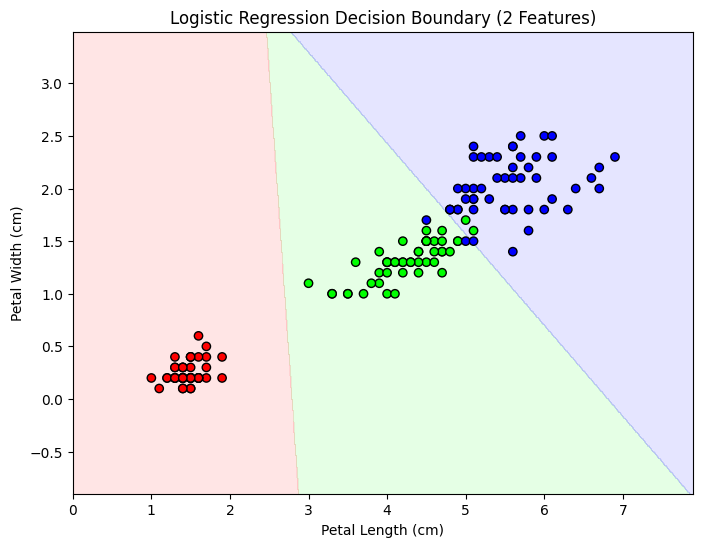

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select only 2 features for plotting
X_vis = df[['petal length (cm)', 'petal width (cm)']].values
y_vis = df['species'].values

# Encode labels to numbers for visualization
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_vis)

# Train logistic regression on just these 2 features
log_reg_vis = LogisticRegression(max_iter=200)
log_reg_vis.fit(X_vis, y_encoded)

# Create meshgrid to plot
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Predict on meshgrid
Z = log_reg_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, cmap=cmap_points, edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Logistic Regression Decision Boundary (2 Features)')
plt.show()


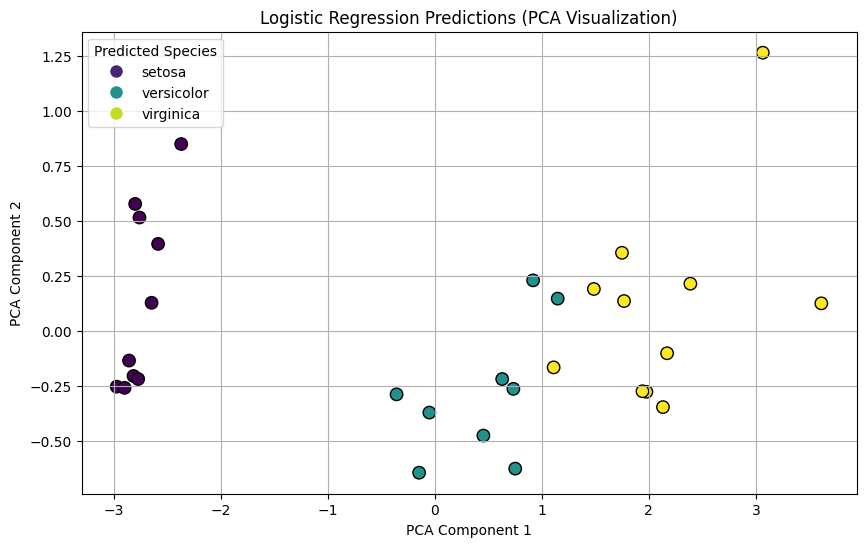

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA on X_test to reduce to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Step 2: Get predictions from the model
y_pred = log_reg.predict(X_test)

# Step 3: Map true and predicted labels to colors
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Step 4: Plot
plt.figure(figsize=(10, 6))

# Plot the predicted points
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_encoded, cmap='viridis', edgecolors='k', s=80)
plt.title('Logistic Regression Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend using label encoder
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.viridis([0.1, 0.5, 0.9]))]
plt.legend(handles=handles, title="Predicted Species")
plt.savefig('../outputs/logistic_regression_pca_plot.png')
plt.show()


In [62]:
with open('../outputs/logistic_regression_accuracy.txt', 'w') as f:
    f.write(f"Logistic Regression Accuracy: {accuracy:.2f}")


In [63]:
import pandas as pd

pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

pred_df.to_csv('../outputs/logistic_regression_predictions.csv', index=False)



# Model 2 - KNN (K-Nearest Neighbors)

#### What is KNN?
KNN is a simple, intuitive classification method.
It looks at the K closest data points to a test point and assigns the most common class among them.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)  # You can try k=5, k=7 too later

# Step 2: Train the model
knn.fit(X_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
# Step 3: Predict on test data
y_pred_knn = knn.predict(X_test)

# Step 4: Check accuracy
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


KNN Accuracy: 1.00


In [66]:
# Save the model
joblib.dump(knn, '../models/knn.pkl')
# Save accuracy to file
with open('../outputs/knn_accuracy.txt', 'w') as f:
    f.write(f"KNN Accuracy: {accuracy_knn:.2f}")

# Save predictions
import pandas as pd
df_knn_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
df_knn_pred.to_csv('../outputs/knn_predictions.csv', index=False)

### ✅ Code to Visualize:


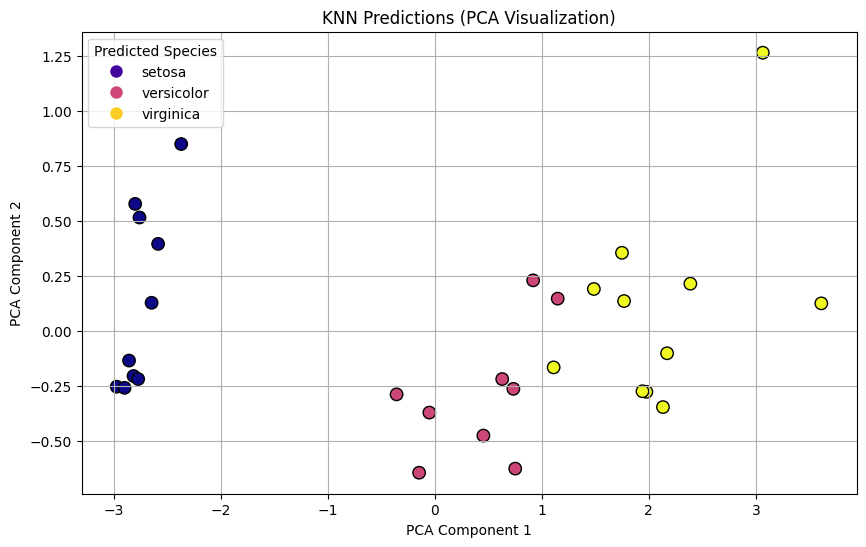

In [67]:
# Step 1: Reduce X_test to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Step 2: Encode predicted labels to color them
le = LabelEncoder()
y_pred_encoded = le.fit_transform(y_pred_knn)

# Step 3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_encoded, cmap='plasma', s=80, edgecolors='k')

plt.title('KNN Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.plasma([0.1, 0.5, 0.9]))]
plt.legend(handles=handles, title="Predicted Species")
plt.savefig('../outputs/knn_pca_plot.png')

plt.show()

#### 🧠 What is a Confusion Matrix?
Think of a confusion matrix like a report card for your model.

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

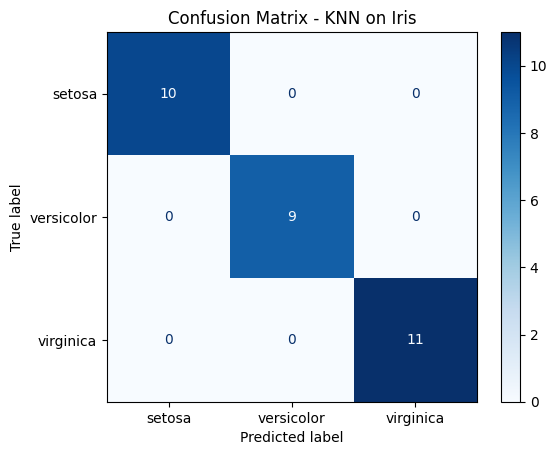

In [69]:
# Step 1: Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

# Step 2: Display it as a visual chart
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Step 3: Plot
disp.plot(cmap='Blues', values_format='d')  # 'd' = integer formatting
plt.title("Confusion Matrix - KNN on Iris")
plt.grid(False)
plt.savefig('../outputs/knn_confusion_matrix.png')
plt.show()

#### 🔍 Meaning:
✅ Diagonal Values → Correct Predictions:
Model predicted Setosa correctly 10 times

Predicted Versicolor correctly 9 times

Predicted Virginica correctly 11 times

# Model 3: Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


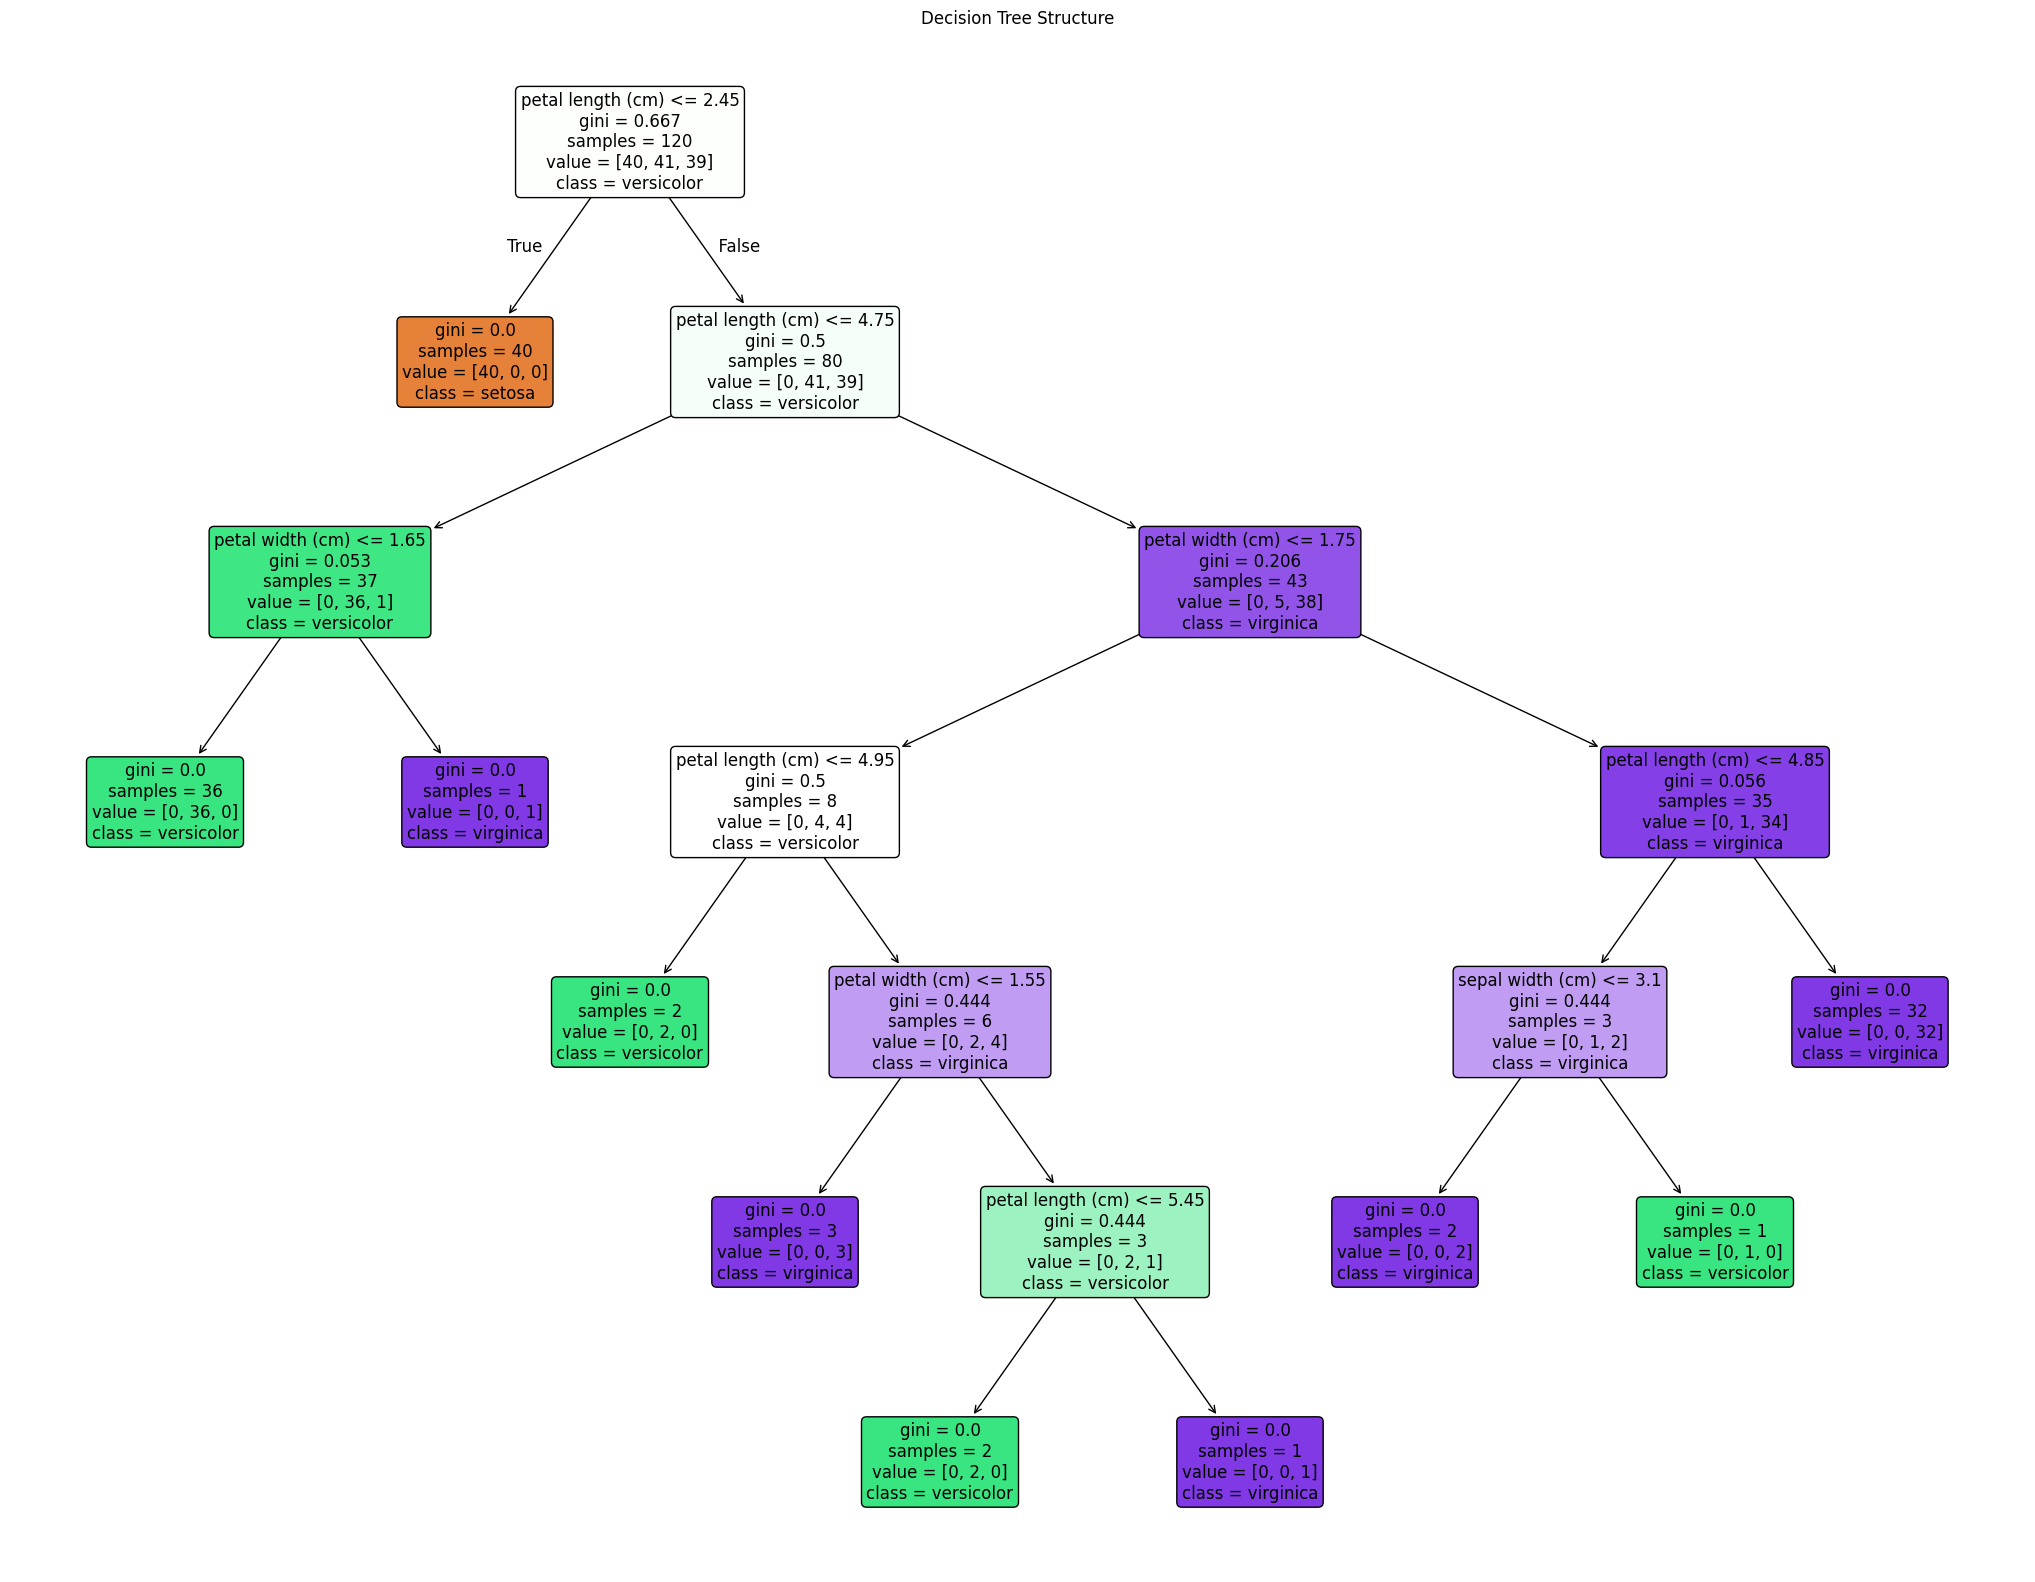

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(26, 20))  # make it big so it’s readable
plot_tree(dtree,
          filled=True,
          feature_names=X.columns,    # if using a DataFrame
          class_names=dtree.classes_,
          rounded=True,
          fontsize=12)

plt.title("Decision Tree Structure")
plt.savefig('../outputs/decision_tree_structure.png')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred_tree = dtree.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")


Decision Tree Accuracy: 1.00


In [73]:
# Save the trained model
joblib.dump(dtree, '../models/decision_tree.pkl')

# Save accuracy to file
with open('../outputs/decision_tree_accuracy.txt', 'w') as f:
    f.write(f"Decision Tree Accuracy: {accuracy_tree:.2f}")

# Save predictions
import pandas as pd

df_tree_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_tree
})
df_tree_pred.to_csv('../outputs/decision_tree_predictions.csv', index=False)

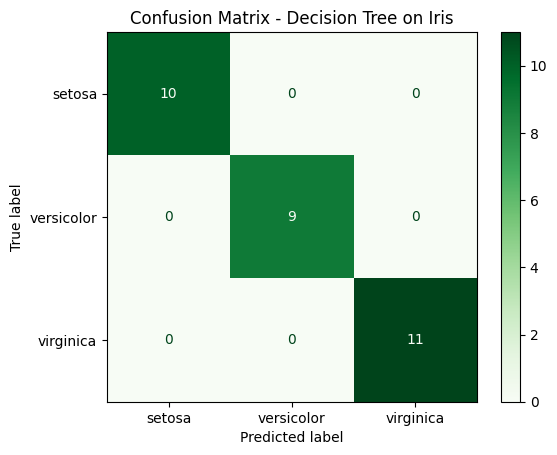

In [74]:
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=dtree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=dtree.classes_)

disp_tree.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Decision Tree on Iris")
plt.grid(False)
plt.savefig('../outputs/decision_tree_confusion_matrix.png')
plt.show()

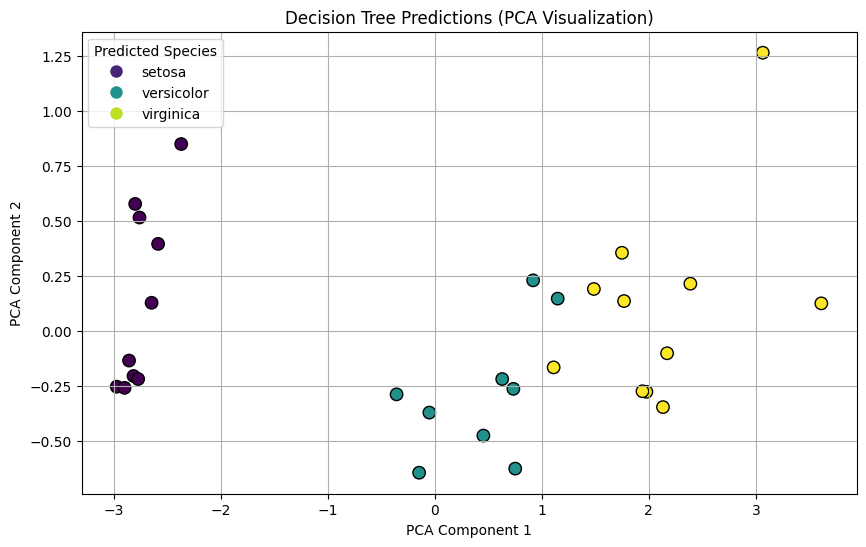

In [75]:
# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Step 2: Encode predicted labels to color them
le = LabelEncoder()
y_pred_tree_encoded = le.fit_transform(y_pred_tree)

# Step 3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_tree_encoded, cmap='viridis', s=80, edgecolors='k')

plt.title('Decision Tree Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Step 4: Add legend
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.viridis([0.1, 0.5, 0.9]))]
plt.legend(handles=handles, title="Predicted Species")

# Step 5 (optional): Save to output folder
plt.savefig('../outputs/decision_tree_pca_plot.png')

plt.show()

# Model 4: Support Vector Machine (SVM)

In [76]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [77]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 1.00


In [78]:
# Save model
joblib.dump(svm_model, '../models/svm_model.pkl')

# Save accuracy
with open('../outputs/svm_accuracy.txt', 'w') as f:
    f.write(f"SVM Accuracy: {accuracy_svm:.2f}")

# Save predictions
df_svm_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svm
})
df_svm_pred.to_csv('../outputs/svm_predictions.csv', index=False)

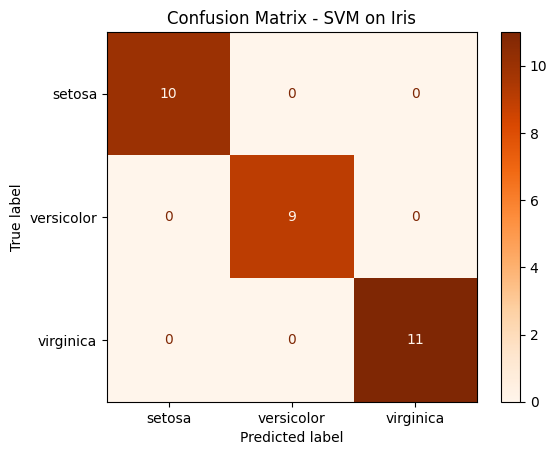

In [79]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

disp_svm.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - SVM on Iris")
plt.grid(False)
plt.savefig('../outputs/svm_confusion_matrix.png')
plt.show()

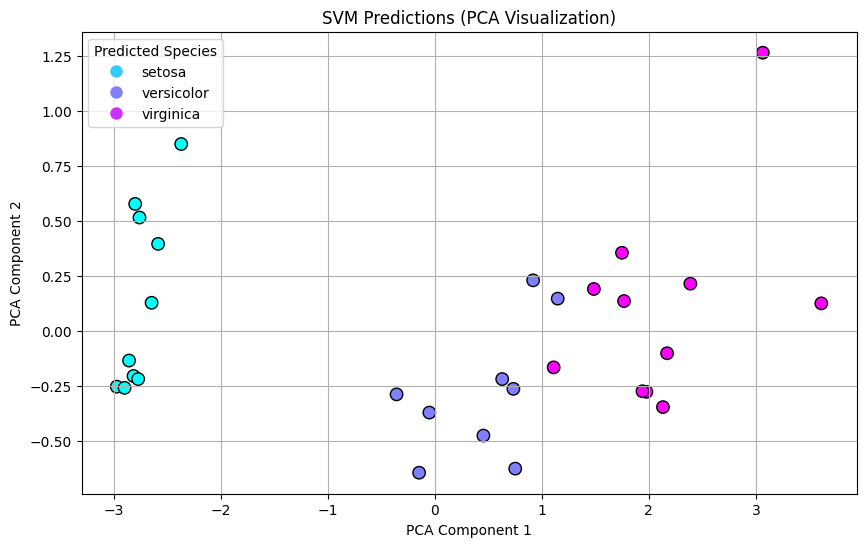

In [80]:
# Reduce dimensions
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Encode predicted labels
le = LabelEncoder()
y_pred_svm_encoded = le.fit_transform(y_pred_svm)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_svm_encoded, cmap='cool', s=80, edgecolors='k')

plt.title('SVM Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.cool([0.2, 0.5, 0.8]))]
plt.legend(handles=handles, title="Predicted Species")

# Save
plt.savefig('../outputs/svm_pca_plot.png')
plt.show()

# Model 5: Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

# Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [82]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Naive Bayes Accuracy: 1.00


In [83]:
# Save model
joblib.dump(nb_model, '../models/naive_bayes_model.pkl')

# Save accuracy
with open('../outputs/naive_bayes_accuracy.txt', 'w') as f:
    f.write(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Save predictions
df_nb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nb})
df_nb.to_csv('../outputs/naive_bayes_predictions.csv', index=False)

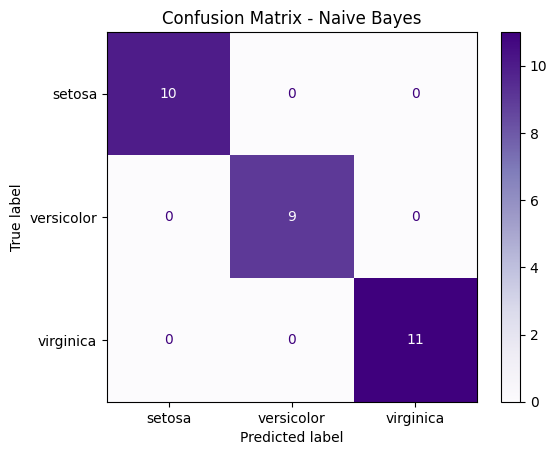

In [84]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)

disp_nb.plot(cmap='Purples', values_format='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.grid(False)
plt.savefig('../outputs/naive_bayes_confusion_matrix.png')
plt.show()

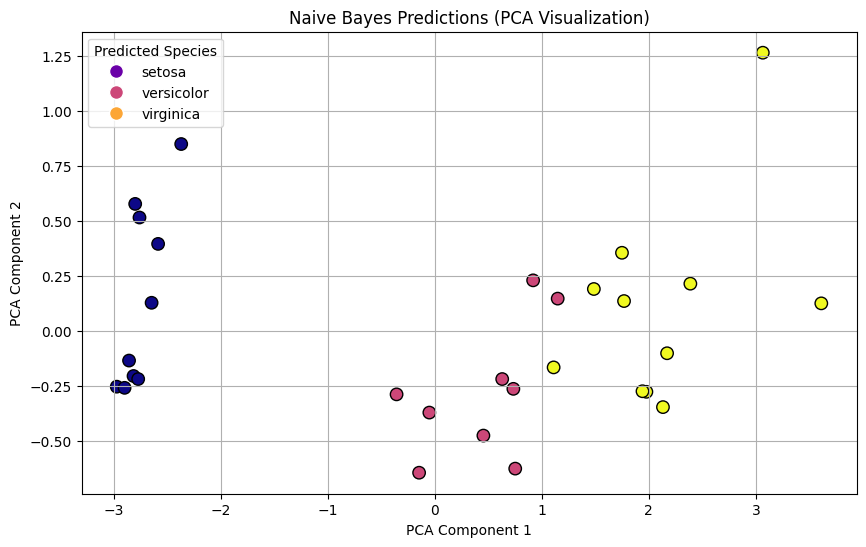

In [85]:
# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Encode predicted labels
le = LabelEncoder()
y_pred_nb_encoded = le.fit_transform(y_pred_nb)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_nb_encoded, cmap='plasma', s=80, edgecolors='k')

plt.title('Naive Bayes Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.plasma([0.2, 0.5, 0.8]))]
plt.legend(handles=handles, title="Predicted Species")

# Save
plt.savefig('../outputs/naive_bayes_pca_plot.png')
plt.show()

# Model 6: Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train it
rf_model.fit(X_train, y_train)


,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_pred_rf = rf_model.predict(X_test)


In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy, 2))

# Save accuracy
with open('../outputs/rf_accuracy.txt', 'w') as f:
    f.write(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 1.0


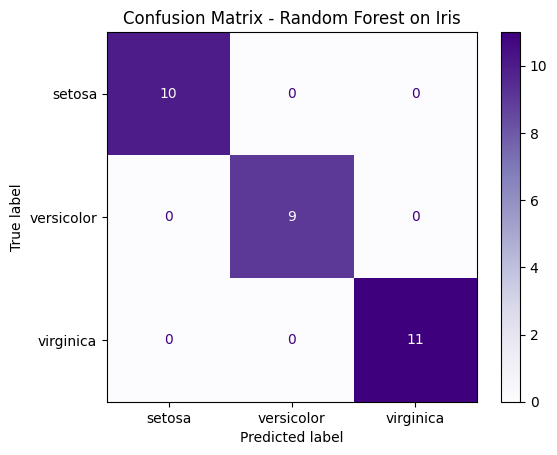

In [90]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Random Forest on Iris")
plt.savefig('../outputs/rf_confusion_matrix.png')
plt.show()

In [91]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})
predictions_df.to_csv('../outputs/rf_predictions.csv', index=False)

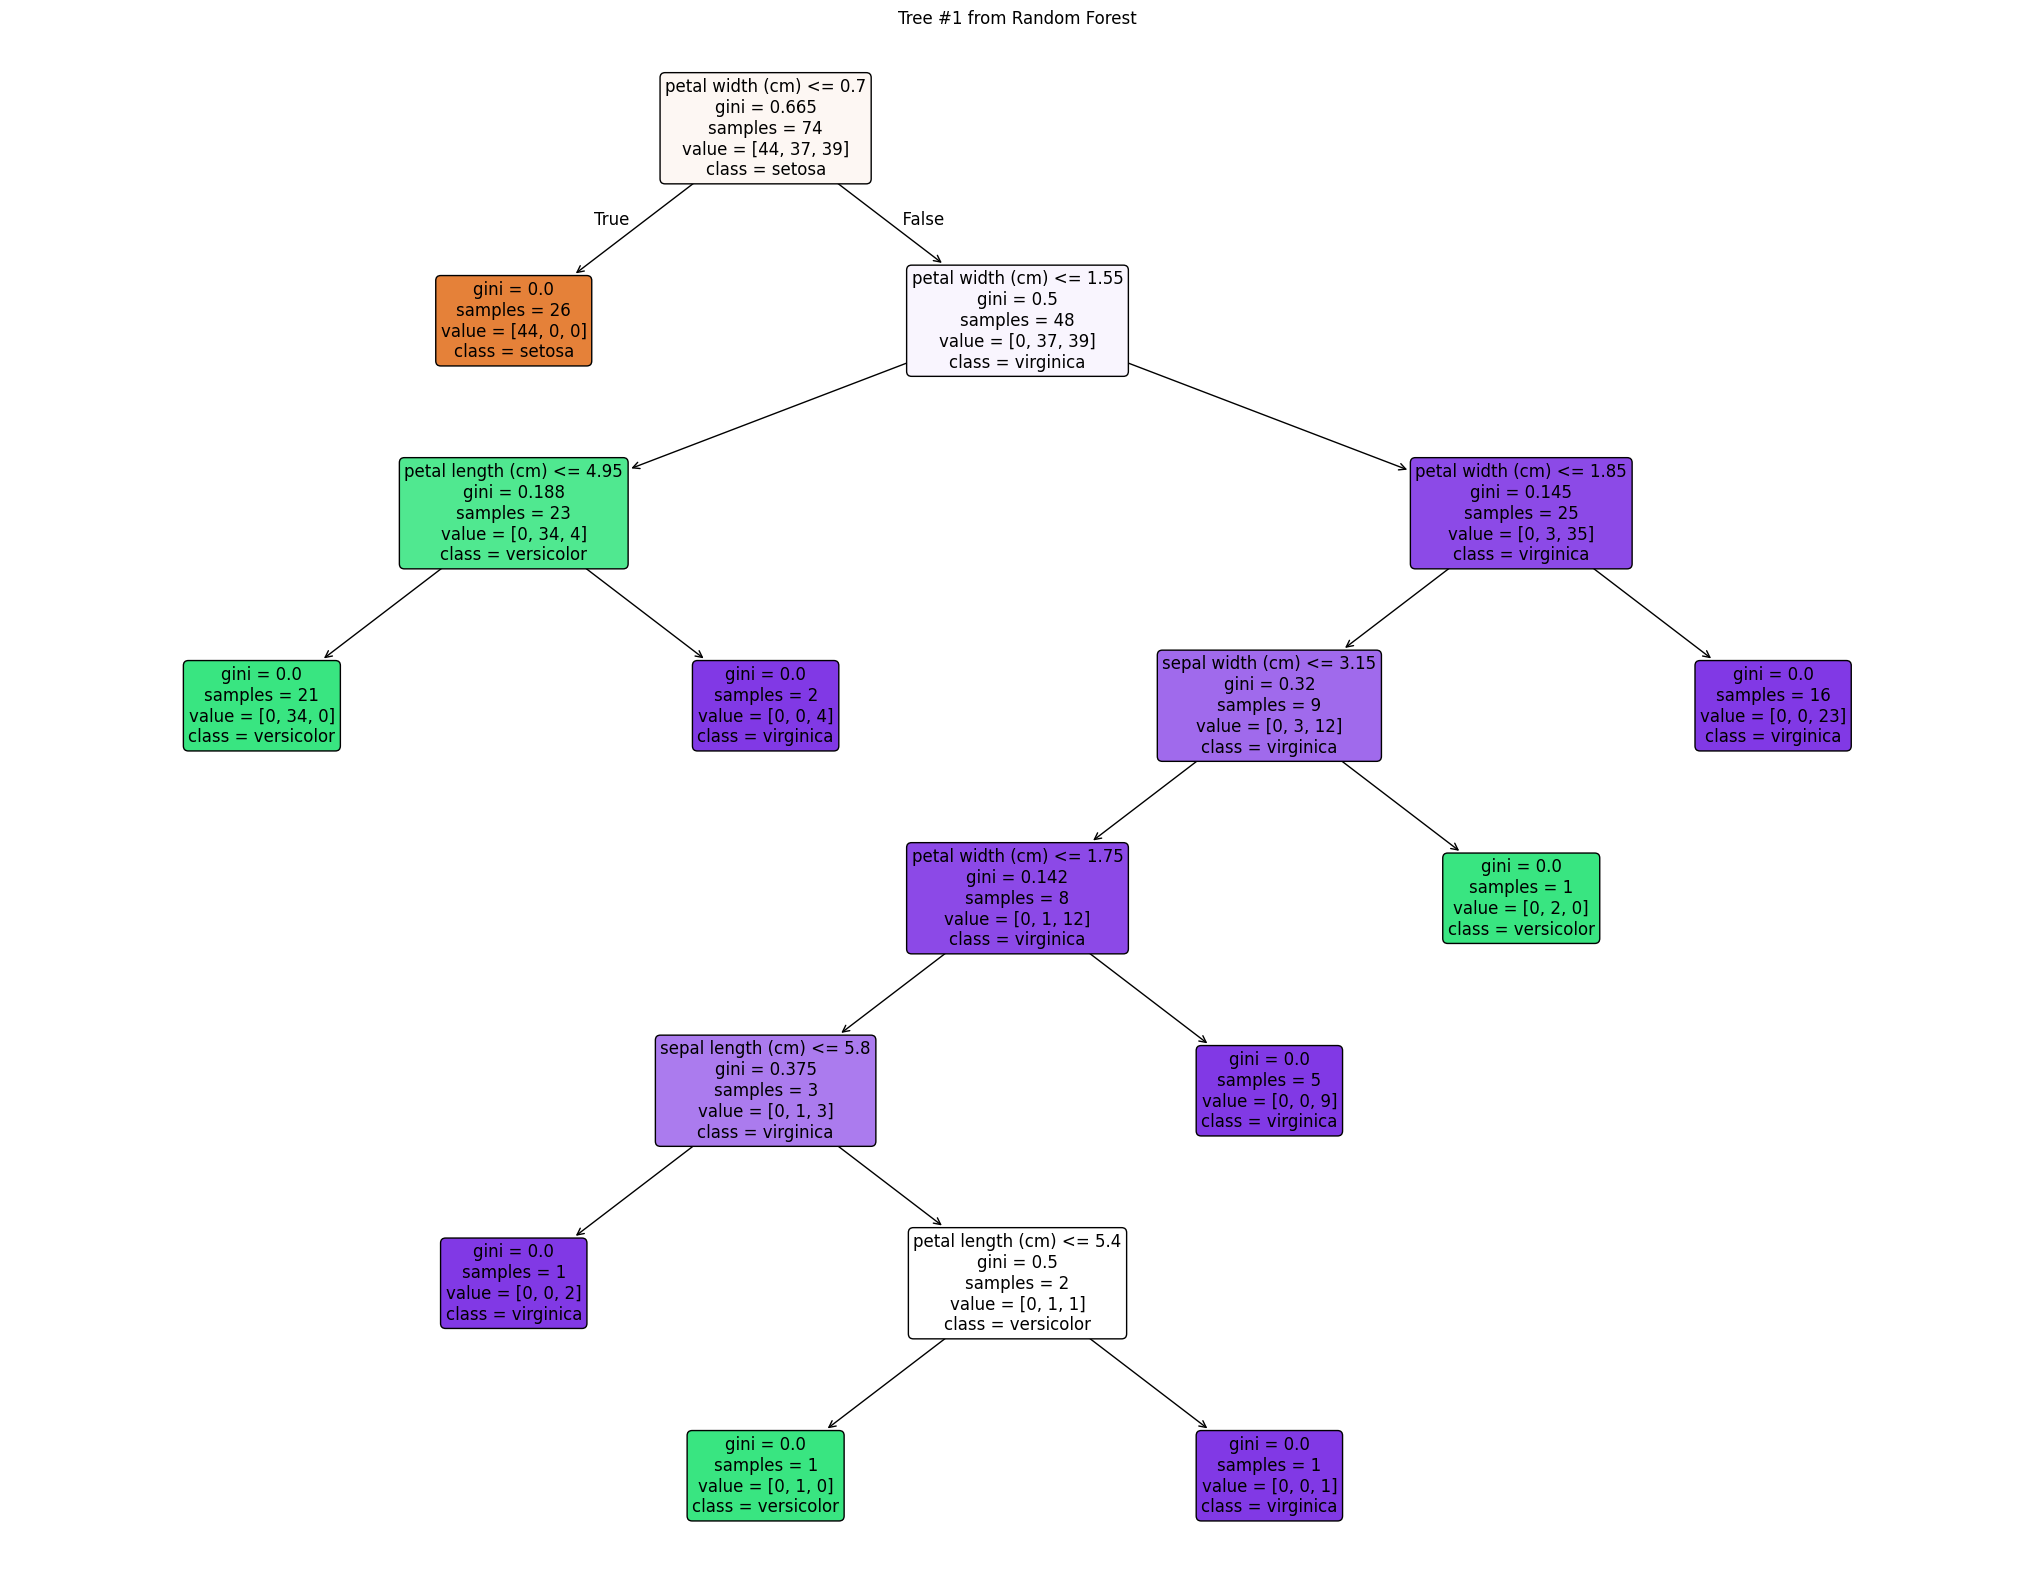

In [93]:
plt.figure(figsize=(26, 20))
plot_tree(
    rf_model.estimators_[0],  # First tree
    filled=True,
    feature_names=X.columns,
    class_names=rf_model.classes_,
    rounded=True,
    fontsize=12
)

plt.title("Tree #1 from Random Forest")
plt.savefig('../outputs/rf_tree_1_structure.png')
plt.show()

In [94]:
joblib.dump(rf_model, '../models/random_forest.pkl')

['../models/random_forest.pkl']